In [1]:
import spacy
import codecs
from spacy import displacy
from collections import Counter
import en_core_web_sm
import numpy as np
nlp = en_core_web_sm.load()
import pandas as pd
from scipy.cluster.hierarchy import ward, dendrogram
from scipy.cluster.hierarchy import median, dendrogram
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import scipy.spatial.distance as ssd
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from scipy.spatial.distance import cdist
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from scipy.cluster.hierarchy import dendrogram, linkage
import re
import gzip
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
from pandas import *
pd.set_option('display.max_colwidth', -1)
nrOfArticles=int(input())
data = read_csv("buoy_46237_2017.csv", skiprows=[0,1],names = ["#YY","MM","DD","hh","mm","WVHT", "DPD", "APD", "MWD", "WTMP"], usecols=["WVHT","MWD"] ,sep = ",")
data

1000


,WVHT,MWD
0,1.76,283
1,1.76,273
2,1.78,273
3,1.66,276
4,1.57,279
5,1.55,282
6,1.50,280
7,1.54,276
8,1.52,277
9,1.51,276


In [1]:
from pandas import *
pd.set_option('display.max_colwidth', -1)
nrOfArticles=int(input())
data = read_csv("part-00000-367d2960-fae6-4efe-a973-974d6fb9ce77-c000.csv", sep = ";", skiprows=1, nrows=nrOfArticles, names = ["domainid","itemid","created_at","updated_at","fulltext","topics"],usecols=["topics"])


NameError: name 'pd' is not defined

In [27]:
def returnArticles():
    entitiesPerArticle = []
    #data2 = read_csv("part-00000-367d2960-fae6-4efe-a973-974d6fb9ce77-c000.csv", sep = ";", skiprows=1, nrows=nrOfArticles, names = ["domainid","itemid","created_at","updated_at","fulltext","topics"], usecols=['fulltext'], skipinitialspace=True)
    df2=pd.DataFrame(data)
    
for index, row in df2.iterrows():
    if (type(row['WVHT']) is float):
        entitiesPerArticle.append([])
        
        else:
            
            entitiesPerArticle.append(row['WVHT'].split(' '))
    
return entitiesPerArticle
#iterating over all aerticles to get all NEs
articles = returnArticles()


SyntaxError: invalid syntax (<ipython-input-27-57213988768f>, line 10)

In [8]:
columnTopics = data.topics
df1 = pd.DataFrame(columnTopics)

# creating LDA matrix
LDA=data['topics'].str.split(',', expand=True)
LDA=LDA.values
for i in np.arange(LDA.shape[0]):
    LDA[i,:] = list(map(lambda x: float(x), LDA[i,:]))

    
# creating an article list 
def returnArticles():
    entitiesPerArticle = []
    data2 = read_csv("part-00000-367d2960-fae6-4efe-a973-974d6fb9ce77-c000.csv", sep = ";", skiprows=1, nrows=nrOfArticles, names = ["domainid","itemid","created_at","updated_at","fulltext","topics"], usecols=['fulltext'], skipinitialspace=True)
    df2=pd.DataFrame(data2)
    
#iteration over each article to store each article in this list and if its empty row then append empty list
#if its not empty then split all the name entities 
    for index, row in df2.iterrows():
        if (type(row['fulltext']) is float):
            entitiesPerArticle.append([])
        else:
            entitiesPerArticle.append(row['fulltext'].split(' '))
    return entitiesPerArticle
#iterating over all aerticles to get all NEs
articles = returnArticles()
allEntities = list(set([item for sublist in articles for item in sublist]))

len(articles)


1000

In [9]:
#it take NEs from all articles and each individual article to show the position of each NE
def compareEntities(textentities, allentities):
    res = np.zeros(len(allentities),dtype=np.int)
    for myIdx, myVal in enumerate(textentities):
        for index, val in enumerate(allentities):
            #print(type(myVal), type(val))
            if (myVal == val):
                res[index] = 1
    return res

# creating the named entity matrix with shape (nrOfArticles x nrOfAllEntities)

A = np.zeros([nrOfArticles, len(allEntities)], dtype=np.float)

for i in np.arange(nrOfArticles):
    output = compareEntities(articles[i], allEntities)
    #print(output.shape)
    A[i,:]=output
A.shape

(1000, 46573)

In [10]:
def cluster(concat):
    #titles =["a{}".format(x) for x in range(1,nrOfArticles+1)]
    print(concat.shape)
    dist = 1 - cosine_similarity(concat)
    linkage_matrix = median(dist)
    
    nClusters = getNumberOfClusters(linkage_matrix)
    clusterAssociation = fcluster(linkage_matrix, nClusters, criterion='maxclust')
    
  
    fig, ax = plt.subplots(figsize=(15, 20))
    # labels=titles
    ax = dendrogram(linkage_matrix, orientation="right")
    
class Clustering:
    
    titles =["a{}".format(x) for x in range(1,nrOfArticles+1)]

    def main(self):
        concatenate=np.concatenate((A, LDA), axis=1)
        row = 0
        while (row < concatenate.shape[0]):
            if (np.all(concatenate[row][0:A.shape[1]]==0)):
                concatenate = np.delete(concatenate, (row), axis=0)
            else:
                row+=1
        print(concatenate.shape)
        
        if (nrOfArticles > 50):
            for i in np.arange(0, concatenate.shape[0]):
                for j in np.arange(0, concatenate.shape[1]):
                    if (np.isnan(concatenate[i][j])):
                        concatenate[i][j] = np.nan_to_num(concatenate[i][j])
        
        X = concatenate
        Z = linkage(X, 'centroid')
        self.titles = self.titles[0:X.shape[0]]
        self.createHierarchicalCluster(X)
        self.showArticleCluster(X)
        self.showElbowMethod(Z)
        #self.showElbowMethod(ward(dist))
    
    
    def showElbowMethod(self, linkage_matrix):
        last = linkage_matrix[-500:, 2]
        last_rev = last[::-1]
        idxs = np.arange(1, len(last) + 1)
#         plt.xlabel("Number of Clusters")
#         plt.ylabel("Variance Explained")
        plt.plot(idxs, last_rev)

        acceleration = np.diff(last, 2)  # 2nd derivative of the distances
        acceleration_rev = acceleration[::-1]
        plt.plot(idxs[:-2] + 1, acceleration_rev)
        labels=['Cluster1', 'Cluster2']
        plt.legend(labels)
        
        plt.xlabel("Number of Clusters")
        plt.ylabel("Variance Explained")
        plt.show()
        k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
        print("clusters:", k)
        return k
    
    # plotting the dendogram
    def createHierarchicalCluster(self, X):
        linkage_matrix = median(X)
        
        fig, ax = plt.subplots(figsize=(15, 20))
        ax = dendrogram(linkage_matrix, orientation="right", labels=self.titles)
        
        plt.tick_params(\
            axis= 'x',
            which='both',
      
#             bottom='off',
#             top='off',
#             labelbottom='off'
        )

        plt.tight_layout()
    
    def showArticleCluster(self, X):
      
        cluster_colors = {
            0: '#1b9e77', 
            1: '#d95f02',
            2: 'y',
            3: 'k'
         
        }
        
        cluster_names = {
            0: 'Cluster 1', 
            1: 'Cluster 2',
            2: 'Cluster 3',
            3: 'Cluster 4'
          
        }
        
        ldacopy = LDA         
        for i in np.arange(0, ldacopy.shape[0]):
            for j in np.arange(0, ldacopy.shape[1]):
                if (np.isnan(ldacopy[i][j])):
                    ldacopy[i][j] = np.nan_to_num(ldacopy[i][j])
        dist = 1 - cosine_similarity(ldacopy)
        num_clusters = 4
        km = KMeans(n_clusters=num_clusters)
        %time km.fit(LDA)
        clusters = km.labels_.tolist()
        MDS()
        mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
        pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
        xs = pos[:, 0] 
        ys = pos[:, 1]
        titlecopy = ["a{}".format(x) for x in range(1,LDA.shape[0]+1)]
        #print(len(titlecopy), X.shape, LDA.shape, len(clusters))
        print(len(clusters), len(titlecopy))
        df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titlecopy))
        groups = df.groupby('label')
        fig, ax = plt.subplots(figsize=(14, 6)) # set size
        ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
        for name, group in groups:
            ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
            ax.set_aspect('auto')
            ax.tick_params(\
                axis= 'x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
            )
            ax.tick_params(\
                axis= 'y',         # changes apply to the y-axis
               which='both',      # both major and minor ticks are affected
           )
       

        
        ax.legend(numpoints=1)
        for i in range(len(df)):
            ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=20)  
        plt.show()


(754, 46873)
CPU times: user 508 ms, sys: 0 ns, total: 508 ms
Wall time: 128 ms
1000 1000


/home/saharshoushtari/anaconda3/envs/tF/lib/python3.6/site-packages/ipykernel_launcher.py:139: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


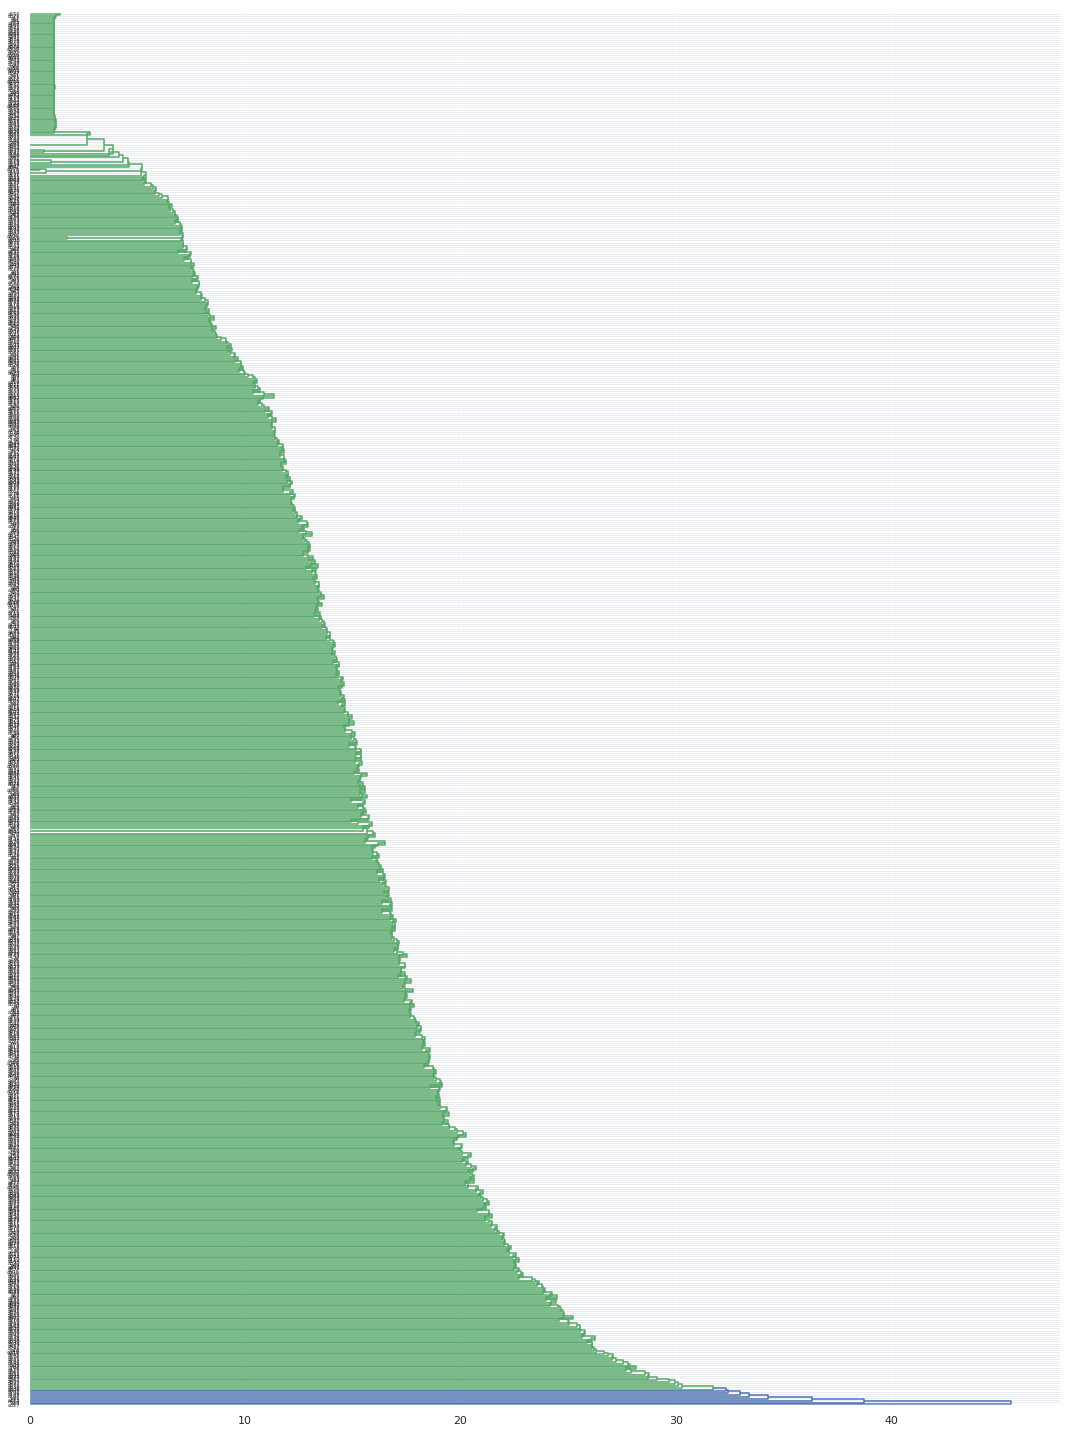

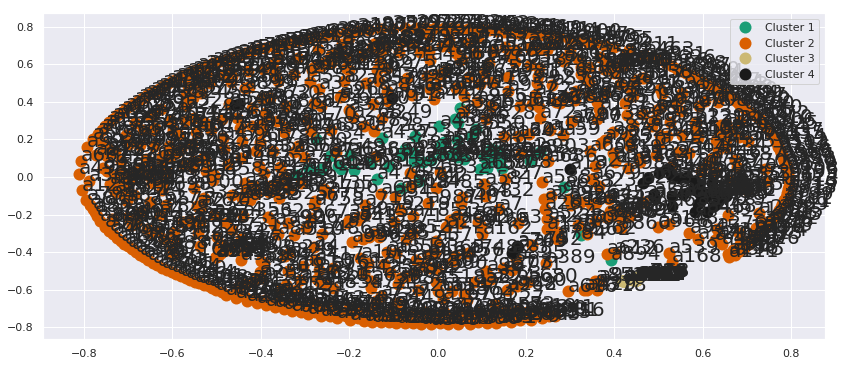

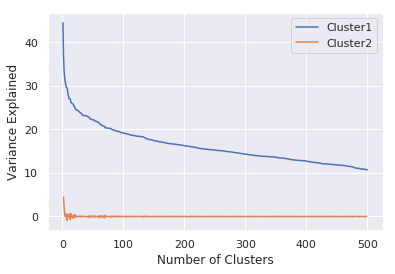

clusters: 2


In [11]:
# create class instance (instantiate object)
c = Clustering()
# invoke function of this instance
c.main()


In [ ]:
pdb off